# Kickstarter Project: Predict how much money a project received

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

Loading packages

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


## Initiating the project

In [3]:
PATH = "data/kickstarter/"

In [4]:
!ls {PATH}

ks-projects-201612.csv ks-projects-201801.csv


In [16]:
df_raw = pd.read_csv(f'{PATH}ks-projects-201801.csv', low_memory=False, 
                     parse_dates=["deadline", "launched"])

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

In [7]:
display_all(df_raw.tail().T)

,378656,378657,378658,378659,378660
ID,999976400,999977640,999986353,999987933,999988282
name,ChknTruk Nationwide Charity Drive 2014 (Canceled),The Tribe,Walls of Remedy- New lesbian Romantic Comedy f...,BioDefense Education Kit,Nou Renmen Ayiti! We Love Haiti!
category,Documentary,Narrative Film,Narrative Film,Technology,Performance Art
main_category,Film & Video,Film & Video,Film & Video,Technology,Art
currency,USD,USD,USD,USD,USD
deadline,2014-10-17 00:00:00,2011-07-19 00:00:00,2010-08-16 00:00:00,2016-02-13 00:00:00,2011-08-16 00:00:00
goal,50000,1500,15000,15000,2000
launched,2014-09-17 02:35:30,2011-06-22 03:35:14,2010-07-01 19:40:30,2016-01-13 18:13:53,2011-07-19 09:07:47
pledged,25,155,20,200,524
state,canceled,failed,failed,failed,failed


In [8]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ID,378661,NaN,NaN,NaN,NaT,NaT,1.07473e+09,6.19086e+08,5971,5.38264e+08,1.07528e+09,1.61015e+09,2.14748e+09
name,378657,375764,New EP/Music Development,41,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,378661,159,Product Design,22314,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_category,378661,15,Film & Video,63585,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,378661,14,USD,295365,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deadline,378661,3164,2014-08-08 00:00:00,705,2009-05-03 00:00:00,2018-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goal,378661,NaN,NaN,NaN,NaT,NaT,49080.8,1.18339e+06,0.01,2000,5200,16000,1e+08
launched,378661,378089,1970-01-01 01:00:00,7,1970-01-01 01:00:00,2018-01-02 15:02:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pledged,378661,NaN,NaN,NaN,NaT,NaT,9682.98,95636,0,30,620,4076,2.0339e+07
state,378661,6,failed,197719,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Quick insights: 
* There are 378,661 projects listed in this dataset.
* The top main category is Film & Video out of 15 categories. The top category is Product Design. 
* Kickstarter projects are funded with 14 different currencies, with most funded in USD.
* Projects come from 23 different countries, with most in the United States.
* The average goal for each project in USD is 45454.40.
* The average pledges amount 9058.82. Roughly speaking, most projects are only 20% funded. 
* Most projects have the failed status -> 197,719 of them!

## 'Massaging the data'

We are dropping values that are related to currency not in real USD.

In [17]:
df_raw = df_raw.drop(['pledged', 'usd pledged', 'goal'], axis=1)

Add a column for duration between launch date and deadline

In [18]:
df_raw['duration'] = df_raw.deadline - df_raw.launched

In [19]:
df_raw['duration'] = df_raw.duration.dt.days

Modify date for df_raw

In [20]:
add_datepart(df_raw, 'deadline')

In [21]:
add_datepart(df_raw, 'launched')

Logging the currency calues

In [22]:
df_raw['usd_pledged_real'] = np.log1p(df_raw['usd_pledged_real'])

In [23]:
#df_raw['usd_goal_real'] = np.log(df_raw['usd_goal_real'])

Convert things to category

In [24]:
train_cats(df_raw)

Check for missing values. These cannot be passed directly to random forest

In [25]:
#display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Save to feather

In [26]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/kickstarter-raw')

### Our model will aim to predict the log value of the amount of dollars pledged in real USD

## First step to modelling

In [27]:
df_raw = pd.read_feather('tmp/kickstarter-raw')

Split dependent variable from the set

In [28]:
df, y, nas = proc_df(df_raw, 'usd_pledged_real')

In [29]:
df_raw.shape

(378661, 37)

Split the dataset to training set and validation set

In [30]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000
n_trn = len(df)-n_valid

In [31]:
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((366661, 36), (366661,), (12000, 36))

A function to calculate score

In [32]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

Use a smaller subset for faster training

In [33]:
df_trn, y_trn, nas = proc_df(df_raw, 'usd_pledged_real', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [34]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3.64 s, sys: 35.6 ms, total: 3.67 s
Wall time: 1.2 s
[0.3700649705619026, 0.8752678854281973, 0.9873961255207553, 0.930530935314201]


A model with 10 trees trained on a subset of 20,000 observations, we obtained a score of 0.9305 on the validation set

## Single tree

Creating a single tree

In [58]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 119 ms, sys: 9.01 ms, total: 128 ms
Wall time: 163 ms
[1.029066876607123, 1.080417611078068, 0.9049893078079192, 0.8941495343104292]


A single tree can score 0.8941 on the validation set. 

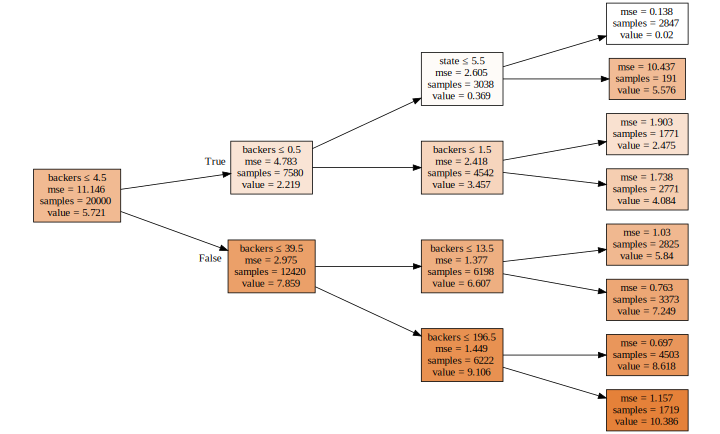

In [59]:
draw_tree(m.estimators_[0], df_trn, precision=3)

This single tree surprisingly does very well for a tree that uses 1 estimator and a depth of 3

Create a bigger tree

In [60]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 449 ms, sys: 9.42 ms, total: 459 ms
Wall time: 482 ms
[2.1485699078958847e-05, 1.205533918790999, 0.9999999999585825, 0.8682142865734637]


The main takeaway from this part is the observation of how each tree perform. The bigger tree is to help us understand that it performs not so well on the validation set. Hence, we'll need to move forward with bagging

## Bagging time

In [61]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3.56 s, sys: 32.7 ms, total: 3.59 s
Wall time: 1.19 s
[0.35779961862666665, 0.8913458294723939, 0.9885141000258114, 0.9279553165865279]


In [62]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([4.86892, 4.98361, 5.42495, 5.03695, 4.99721, 4.32241, 4.98361, 4.29401, 7.10743, 4.98361]),
 5.100270241624516,
 5.817111159963204)

In [63]:
preds.shape

(10, 12000)

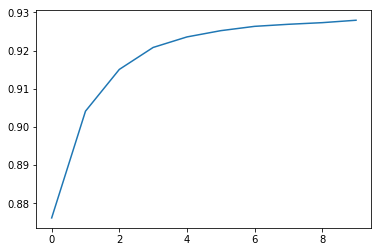

In [64]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [65]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 7.52 s, sys: 68.4 ms, total: 7.59 s
Wall time: 2.22 s
[0.33046339687772913, 0.880529986899589, 0.9902021224239703, 0.9296931298266821]


In [66]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 14.8 s, sys: 117 ms, total: 14.9 s
Wall time: 4.29 s
[0.31813048270645317, 0.8692306182006945, 0.9909197908479016, 0.9314859729014848]


In [67]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 29.8 s, sys: 222 ms, total: 30 s
Wall time: 8.4 s
[0.3090957612293846, 0.8619670419906922, 0.9914282127760851, 0.9326262400640207]


# OOB score

In [68]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 15.1 s, sys: 122 ms, total: 15.2 s
Wall time: 4.44 s
[0.3140544100525926, 0.8679139284815155, 0.9911509820552787, 0.9316933825070373, 0.9358169346084734]


## Subsampling!!!

Reduce overfitting and make things run faster while using the whole dataset

In [35]:
df_trn, y_trn, nas = proc_df(df_raw, 'usd_pledged_real')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [36]:
set_rf_samples(20000)

In [71]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 1min 53s, sys: 1.23 s, total: 1min 55s
Wall time: 42.4 s
[0.34931570150350927, 0.8473438658062122, 0.9889132882337859, 0.9348928262640123, 0.8836717776027779]


In [72]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 8min 6s, sys: 7.85 s, total: 8min 14s
Wall time: 3min 38s
[0.30575179342632386, 0.8212278090676678, 0.9915061503658813, 0.9388443257884416, 0.9394631067098712]


# Playing with some tree parameters

reset_rf_samples() Use this if you want to reset the rf subsampling behavior. This came from the fact that oob_score is not compatible to this function at the moment

In [37]:
reset_rf_samples()

Change mean_samples_leaf

In [74]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 6min 56s, sys: 3.59 s, total: 7min
Wall time: 2min 13s
[0.4247641800573476, 0.8149945933341123, 0.9836068537211289, 0.9397691601481799, 0.9412581751347124]


In [38]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3min 37s, sys: 1.61 s, total: 3min 38s
Wall time: 1min 1s
[0.4447950861993276, 0.805337363946473, 0.9820242713429813, 0.9411881066070009, 0.9419299451695023]


# Time for some interpretation

In [13]:
set_plot_sizes(12,14,16)

In [39]:
set_rf_samples(50000)

In [40]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3min 38s, sys: 1.82 s, total: 3min 40s
Wall time: 1min 4s
[0.4447772204018681, 0.8076817534289191, 0.9820257153529878, 0.9408451977184086, 0.9418857350028726]


Look at the standard deviation of the estimate to see how we are doing

In [82]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.51 s, sys: 33.5 ms, total: 1.54 s
Wall time: 1.64 s


(5.286435354322831, 0.8601949454653725)

Use parallel processing to speed this up

In [84]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 293 ms, sys: 199 ms, total: 492 ms
Wall time: 1.53 s


(5.286435354322831, 0.8601949454653725)

In [85]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)

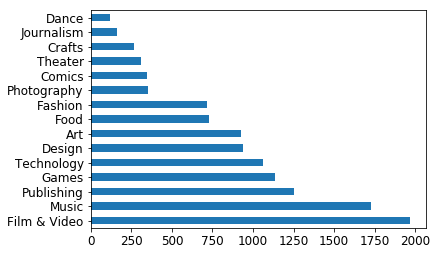

In [87]:
x.main_category.value_counts().plot.barh();

In [89]:
flds = ['main_category', 'usd_pledged_real', 'pred', 'pred_std']
mcat_summ = x[flds].groupby('main_category', as_index=False).mean()
mcat_summ

,main_category,usd_pledged_real,pred,pred_std
0,Art,5.491955,5.489061,0.474017
1,Comics,6.904368,7.020463,0.453156
2,Crafts,4.261308,4.234577,0.603922
3,Dance,6.450647,6.461249,0.315619
4,Design,6.934996,6.904862,0.568176
5,Fashion,5.107895,5.056085,0.501848
6,Film & Video,5.703763,5.694458,0.469515
7,Food,5.302020,5.305656,0.526342
8,Games,6.612444,6.691780,0.545992
9,Journalism,3.915113,4.037021,0.565170


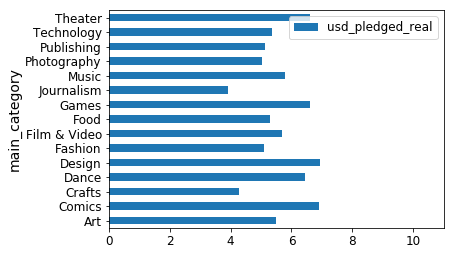

In [91]:
mcat_summ.plot('main_category', 'usd_pledged_real', 'barh', xlim=(0,11));

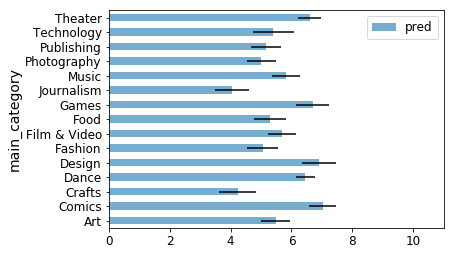

In [92]:
mcat_summ.plot('main_category', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

Question: Why are the predictions nearly exactly right, but the error bars are quite wide?

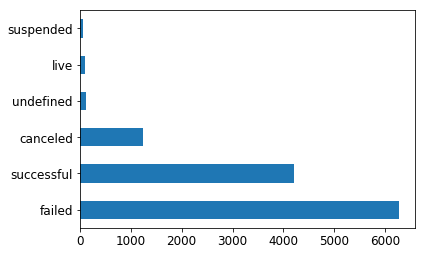

In [94]:
raw_valid.state.value_counts().plot.barh();

In [95]:
flds = ['state', 'usd_pledged_real', 'pred', 'pred_std']
st_summ = x[flds].groupby(flds[0]).mean()
st_summ

,usd_pledged_real,pred,pred_std
state,,,
canceled,4.039191,4.053751,0.549333
failed,4.211051,4.219293,0.630396
live,5.009619,5.071957,0.634480
successful,8.549310,8.549300,0.260613
suspended,3.251897,3.479330,0.976458
undefined,4.833461,5.295841,2.355690


In [96]:
(st_summ.pred_std/st_summ.pred).sort_values(ascending=False)

state
undefined     0.444819
suspended     0.280646
failed        0.149408
canceled      0.135512
live          0.125096
successful    0.030484
dtype: float64

# Feature Importance

In [52]:
fi = rf_feat_importance(m, df_trn); fi[:10]

ValueError: arrays must all be same length

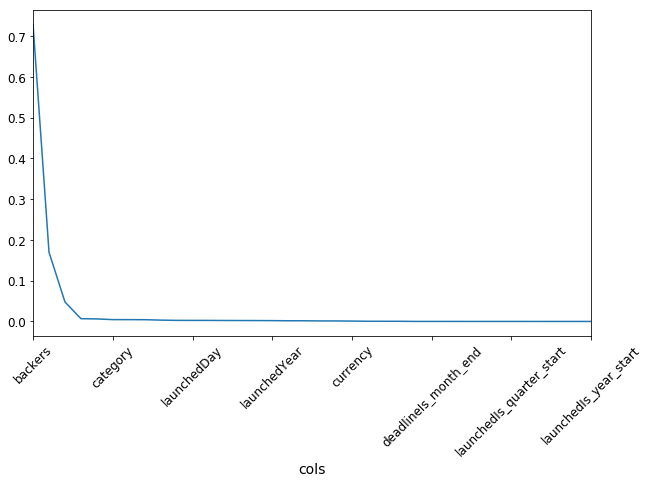

In [105]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False, rot=45);

In [50]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

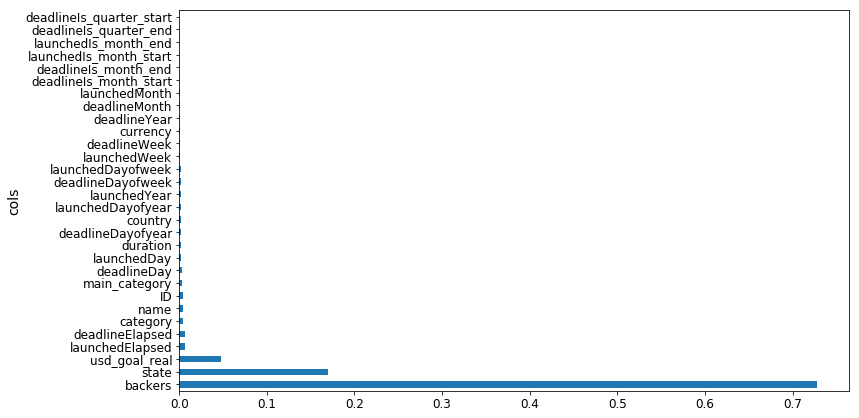

In [110]:
plot_fi(fi[:30]);

In [111]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

5

In [132]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [113]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 52.1 s, sys: 695 ms, total: 52.8 s
Wall time: 16.1 s
[0.5736035337008959, 0.8482317692242481, 0.9701055767873004, 0.9347563074965224, 0.9374607737005312]


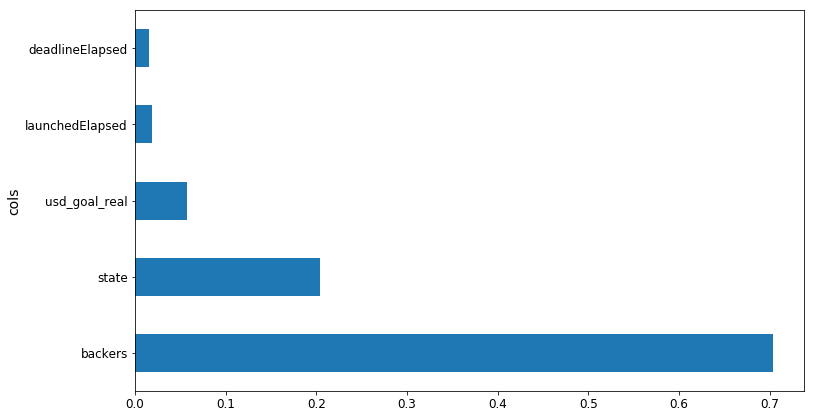

In [114]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

# One-hot encoding

In [41]:
df_trn2, y_trn, nas = proc_df(df_raw, 'usd_pledged_real', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5 , n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3min 42s, sys: 1.6 s, total: 3min 43s
Wall time: 1min 2s
[0.4441121648863128, 0.8052035898772748, 0.9820794274566228, 0.941207643395471, 0.9421486080176313]


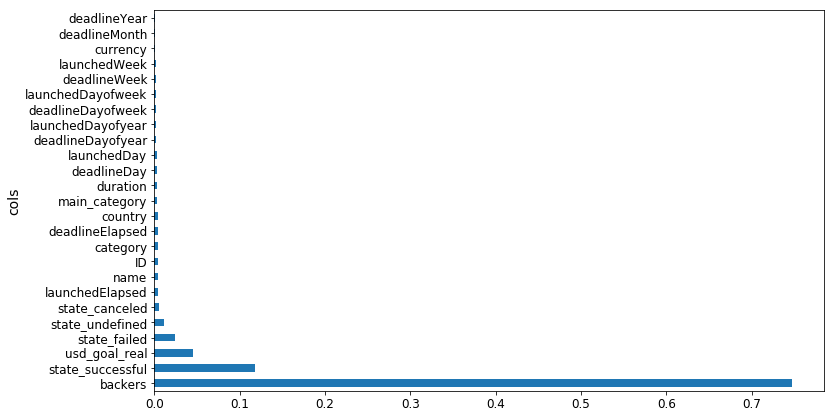

In [118]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

# Eliminate redundant features

In [119]:
from scipy.cluster import hierarchy as hc

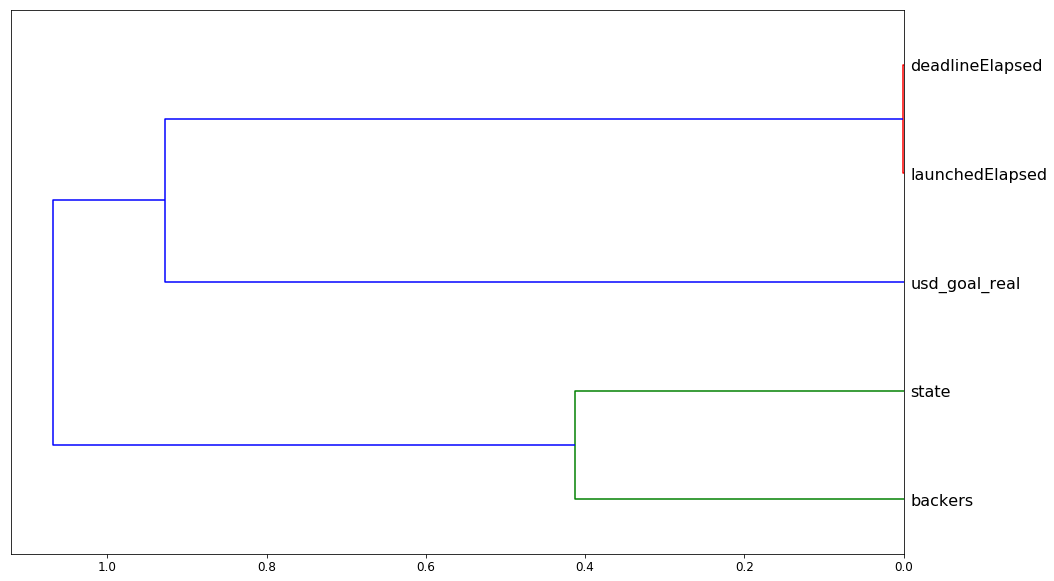

In [120]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [122]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [123]:
get_oob(df_keep)

0.9375465535692823

Try dropping off some variables and see how this affect our model

In [133]:
for c in ('backers', 'state', 'usd_goal_real', 'launchedElapsed', 'deadlineElapsed'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

backers 0.48591803764719677
state 0.9058605784774112
usd_goal_real 0.9153845636123552
launchedElapsed 0.936946139052685
deadlineElapsed 0.9359306091934949


Removing variables didn't really improve anything for us in this case. Might want to look at it all over again

In [42]:
reset_rf_samples()

In [43]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3min 56s, sys: 3.42 s, total: 3min 59s
Wall time: 2min 39s
[0.44472780879030627, 0.8078684178393399, 0.9820297087636094, 0.9408178518678396, 0.9418857971506809]


# Partial Dependence

In [46]:
from pdpbox import pdp
from plotnine import *

[autoreload of matplotlib failed: Traceback (most recent call last):
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/__init__.py", line 729, in <mo

[autoreload of matplotlib.path failed: Traceback (most recent call last):
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/path.py", line 21, in <mo

[autoreload of matplotlib.image failed: Traceback (most recent call last):
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/image.py", line 1273, in

[autoreload of matplotlib.table failed: Traceback (most recent call last):
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/maxvu/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/table.py", line 246, in 

In [47]:
set_rf_samples(50000)

In [48]:
df_trn2, y_trn, nas = proc_df(df_raw, 'usd_pledged_real', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5 , n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3min 43s, sys: 1.79 s, total: 3min 44s
Wall time: 1min 3s
[0.4438697241938871, 0.803760738810863, 0.9820989877861109, 0.9414181556508469, 0.9422190582531673]
